In [1]:
# Importing libraries
import pandas as pd
import numpy as np
from datetime import datetime
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Downloading And Viewing Stock Data

In [2]:
# Creating a list of symbols of the stocks i will be using
symbols = ['MSFT', 'AMZN', 'RACE', 'JPM', 'TSLA', 'NFLX', 'SPY', 'META']

In [3]:
# Creating a start and end date for the stock data
start_date = datetime(2023, 1, 1)
end_date = datetime(2023, 12, 31)

In [4]:
# Collecting the stock data
stock_data = yf.download(symbols, start=start_date, end=end_date)
stock_data.head()

[*********************100%***********************]  8 of 8 completed


Price       Adj Close                                                  \
Ticker           AMZN         JPM        META        MSFT        NFLX   
Date                                                                    
2023-01-03  85.820000  127.490311  124.265312  235.711716  294.950012   
2023-01-04  85.139999  128.679199  126.885307  225.400909  309.410004   
2023-01-05  83.120003  128.650681  126.456947  218.720566  309.700012   
2023-01-06  86.080002  131.112442  129.525223  221.298264  315.549988   
2023-01-09  87.360001  130.570679  128.977310  223.452866  315.170013   

Price                                               Close              ...  \
Ticker            RACE         SPY        TSLA       AMZN         JPM  ...   
Date                                                                   ...   
2023-01-03  212.466675  370.367889  108.099998  85.820000  135.119995  ...   
2023-01-04  216.708725  373.227234  113.639999  85.139999  136.380005  ...   
2023-01-05  213.167130  368.967438  110.339996  83.120003  135.350006  ...   
2023-01-06  221.059280  377.428589  113.059998  86.080002  137.940002  ...   
2023-01-09  225.686066  377.214661  119.769997  87.360001  137.369995  ...   

Price             Open                Volume                                \
Ticker             SPY        TSLA      AMZN       JPM      META      MSFT   
Date                                                                         
2023-01-03  384.369995  118.470001  76706000  11054800  35528500  25740000   
2023-01-04  383.179993  109.110001  68885100  11687600  32397100  50623400   
2023-01-05  381.720001  110.510002  67930800   8381300  25447100  39585600   
2023-01-06  382.609985  103.000000  83303400  10029100  27584500  43613600   
2023-01-09  390.369995  118.959999  65266100   8482300  26649100  27369800   

Price                                              
Ticker         NFLX    RACE        SPY       TSLA  
Date                                               
2023-01-03  6764000  316400   74850700  231402800  
2023-01-04  9345100  354700   85934100  180389000  
2023-01-05  8328400  205900   76970500  157986300  
2023-01-06  8959800  212900  104189600  220911100  
2023-01-09  6766600  564700   73978100  190284000  

[5 rows x 48 columns]

In [5]:
# Removing the timestamp from the date column
stock_data.index = stock_data.index.date

In [6]:
# Creating a df of just the adjusted closing prices
stock_data_adj_closing = stock_data['Adj Close'].reset_index()

# Changing the column name index to date
stock_data_adj_closing = stock_data_adj_closing.rename(columns={'index':'DATE'})
stock_data_adj_closing.head()

Ticker,DATE,AMZN,JPM,META,MSFT,NFLX,RACE,SPY,TSLA
0,2023-01-03,85.820000,127.490311,124.265312,235.711716,294.950012,212.466675,370.367889,108.099998
1,2023-01-04,85.139999,128.679199,126.885307,225.400909,309.410004,216.708725,373.227234,113.639999
2,2023-01-05,83.120003,128.650681,126.456947,218.720566,309.700012,213.167130,368.967438,110.339996
3,2023-01-06,86.080002,131.112442,129.525223,221.298264,315.549988,221.059280,377.428589,113.059998
4,2023-01-09,87.360001,130.570679,128.977310,223.452866,315.170013,225.686066,377.214661,119.769997


# Adjusted Closing Prices

In [7]:
# Creating a list of colours
colours = ['blue', 'orange', 'purple', 'cyan', 'red', 'yellow', 'pink', 'green']

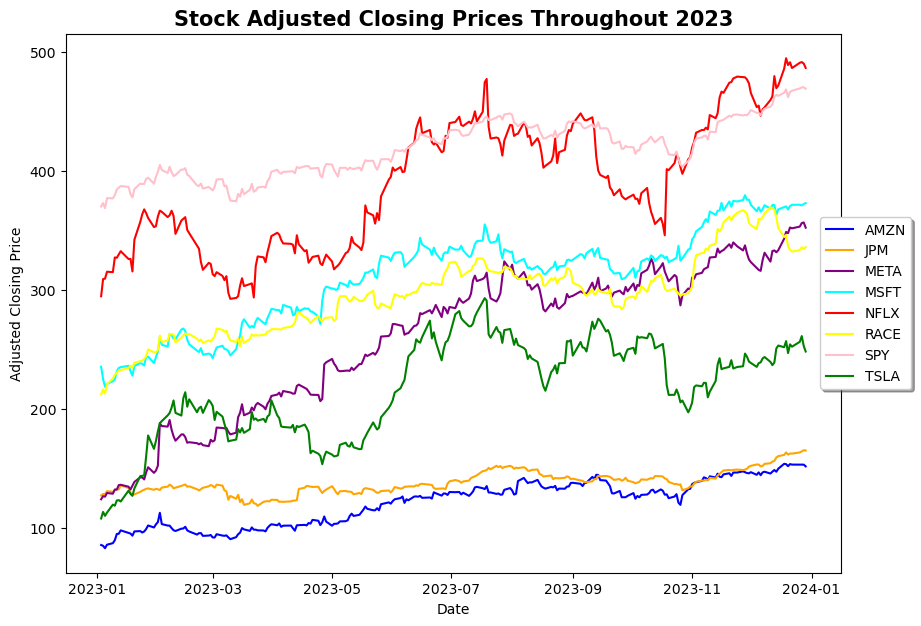

In [8]:
# Visualising the adjusted closing prices over time
stock_data['Adj Close'].plot(figsize=(10,7), color=colours)
plt.title('Stock Adjusted Closing Prices Throughout 2023', fontsize=15, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price')
plt.legend(loc='right', bbox_to_anchor=(1.1, 0.5), fancybox=True, shadow=True)
plt.show()

# Simple Daily Return

In [9]:
# Calculating the simple daily return for each stock
daily_returns = stock_data['Adj Close'].pct_change() *100 # To change decimal output to percentage format for interpretability

In [10]:
# Calculating the simple daily returns for each stock in decimal format
daily_returns_decimal = stock_data['Adj Close'].pct_change()

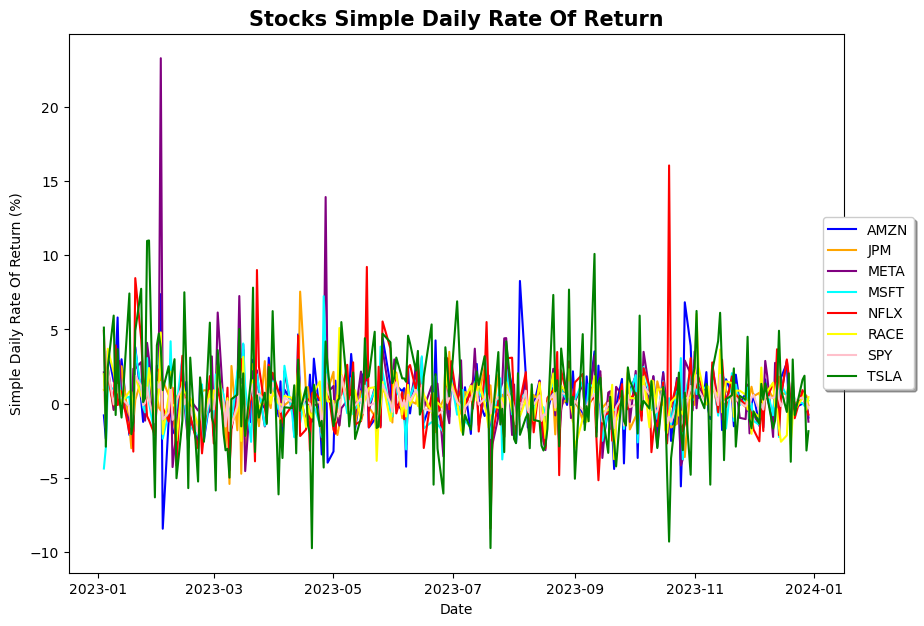

In [11]:
# Visualising the simple daily rate of return for each stock
daily_returns.plot(figsize=(10,7), color=colours)
plt.title('Stocks Simple Daily Rate Of Return', fontsize=15, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Simple Daily Rate Of Return (%)')
plt.legend(loc='right', bbox_to_anchor=(1.1, 0.5), fancybox=True, shadow=True)
plt.show()

In [12]:
# Getting the simple daily ror for each stock in percentage format
amzn_daily_returns = stock_data['Adj Close']['AMZN'].pct_change() * 100
msft_daily_returns = stock_data['Adj Close']['MSFT'].pct_change() * 100
nflx_daily_returns = stock_data['Adj Close']['NFLX'].pct_change() * 100
race_daily_returns = stock_data['Adj Close']['RACE'].pct_change() * 100
jpm_daily_returns = stock_data['Adj Close']['JPM'].pct_change() * 100
spy_daily_returns = stock_data['Adj Close']['SPY'].pct_change() * 100
tsla_daily_returns = stock_data['Adj Close']['TSLA'].pct_change() * 100
meta_daily_returns = stock_data['Adj Close']['META'].pct_change() * 100

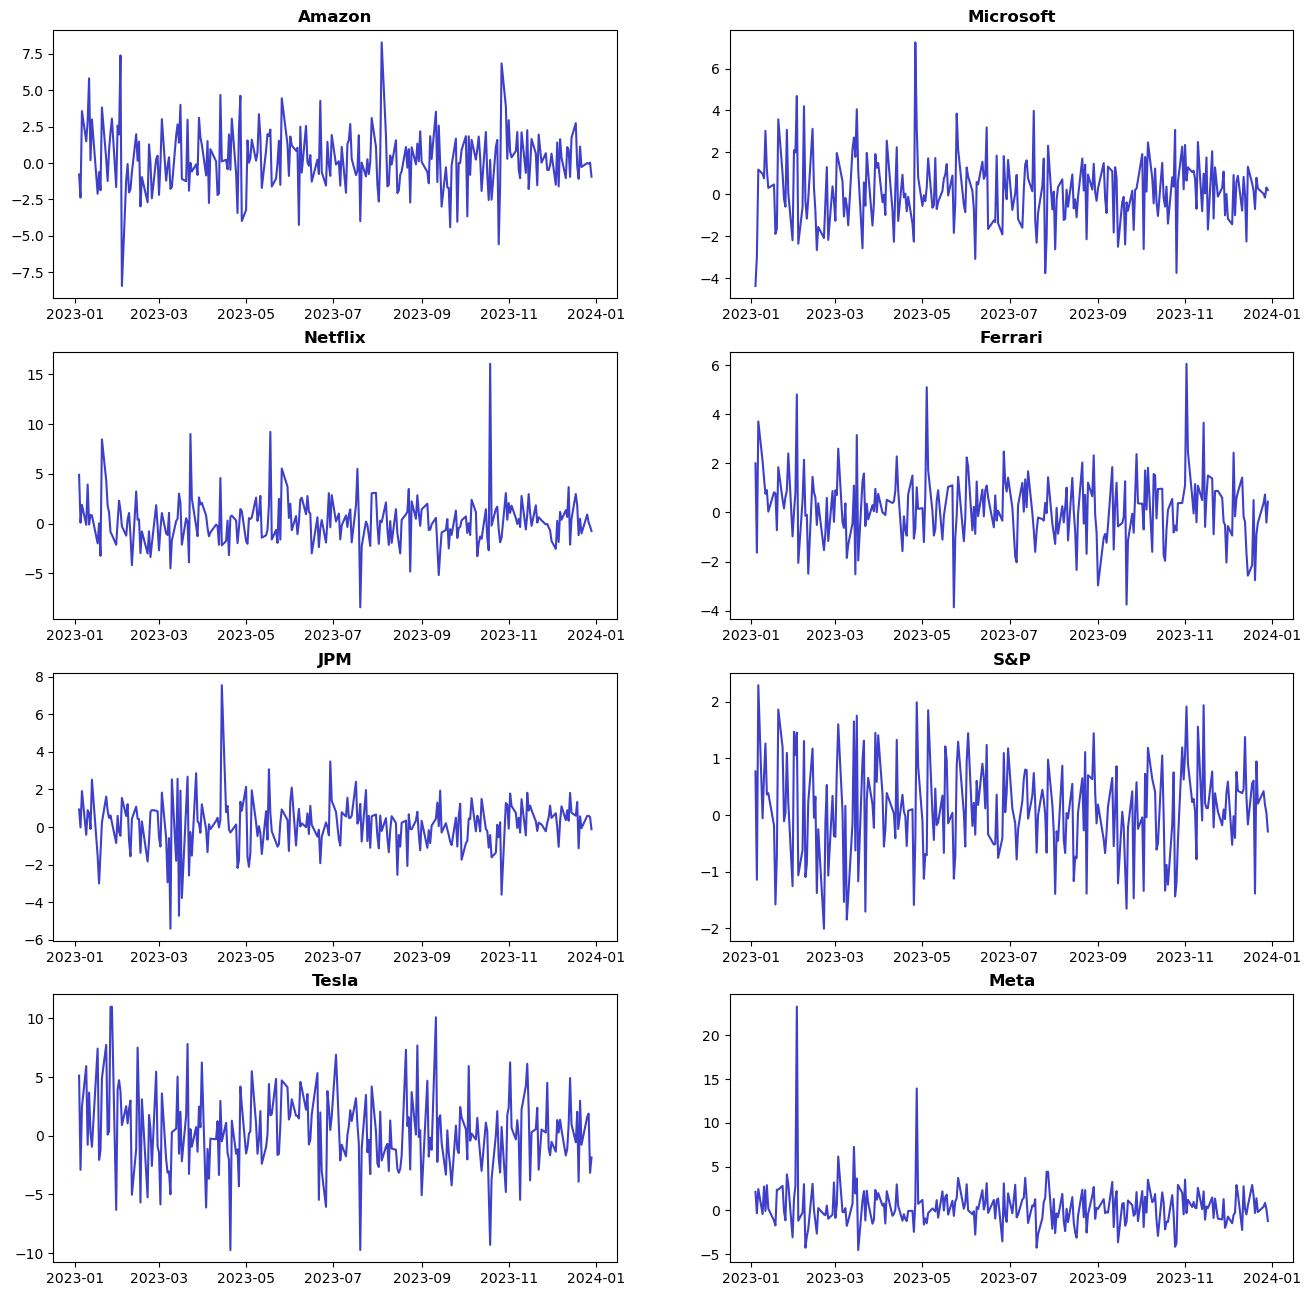

In [13]:
# Visualising the simple daily ror for each stock to view more clearly
plt.figure(figsize=(16,16))
plt.subplot(4,2,1)
amzn_daily_returns.plot(c='#3e40ca')
plt.title('Amazon', fontweight='bold')

plt.subplot(4,2,2)
msft_daily_returns.plot(c='#3e40ca')
plt.title('Microsoft', fontweight='bold')

plt.subplot(4,2,3)
nflx_daily_returns.plot(c='#3e40ca')
plt.title('Netflix', fontweight='bold')

plt.subplot(4,2,4)
race_daily_returns.plot(c='#3e40ca')
plt.title('Ferrari', fontweight='bold')

plt.subplot(4,2,5)
jpm_daily_returns.plot(c='#3e40ca')
plt.title('JPM', fontweight='bold')

plt.subplot(4,2,6)
spy_daily_returns.plot(c='#3e40ca')
plt.title('S&P', fontweight='bold')

plt.subplot(4,2,7)
tsla_daily_returns.plot(c='#3e40ca')
plt.title('Tesla', fontweight='bold')

plt.subplot(4,2,8)
meta_daily_returns.plot(c='#3e40ca')
plt.title('Meta', fontweight='bold')
plt.show()

# Mean Simple Daily Return

In [14]:
# Calculating the mean simple daily return for each stock as percentages
mean_daily_returns = daily_returns.mean()
mean_daily_returns

Ticker
AMZN    0.251149
JPM     0.112830
META    0.449317
MSFT    0.197166
NFLX    0.228751
RACE    0.193503
SPY     0.098500
TSLA    0.389272
dtype: float64

In [15]:
# Calculating the mean simple daily return for each stock as decimals
mean_daily_returns_decimal = daily_returns_decimal.mean()

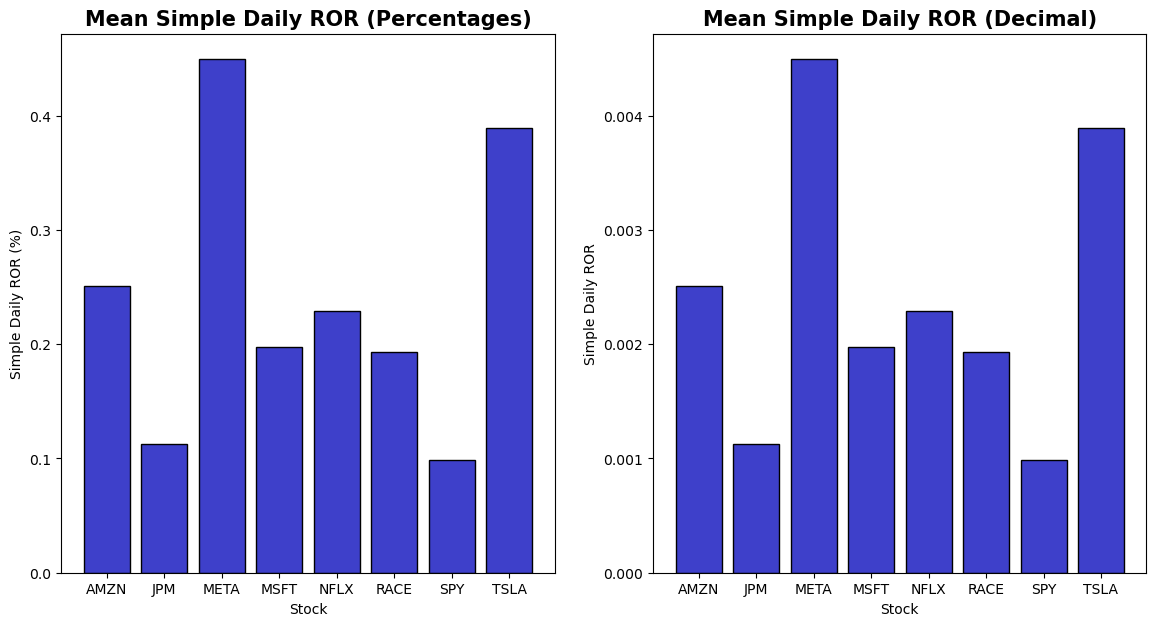

In [16]:
# Visualising the mean simple daily return for each stock in both percentage and decimal format
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.bar(mean_daily_returns.keys(), mean_daily_returns, color='#3e40ca', edgecolor='black')
plt.title('Mean Simple Daily ROR (Percentages)', fontsize=15, fontweight='bold')
plt.xlabel('Stock')
plt.ylabel('Simple Daily ROR (%)')

plt.subplot(1,2,2)
plt.bar(mean_daily_returns_decimal.keys(), mean_daily_returns_decimal, color='#3e40ca', edgecolor='black')
plt.title('Mean Simple Daily ROR (Decimal)', fontsize=15, fontweight='bold')
plt.xlabel('Stock')
plt.ylabel('Simple Daily ROR')
plt.show()

# Annualised Returns

In [17]:
# Calculating the annual return for each stock based on their mean daily return
annual_returns = mean_daily_returns * 252
annual_returns

Ticker
AMZN     63.289659
JPM      28.433242
META    113.227815
MSFT     49.685850
NFLX     57.645161
RACE     48.762638
SPY      24.821914
TSLA     98.096609
dtype: float64

In [18]:
# Calculating the annual return for each stock based on their mean daily return in decimal format
annual_returns_decimal = mean_daily_returns_decimal * 252

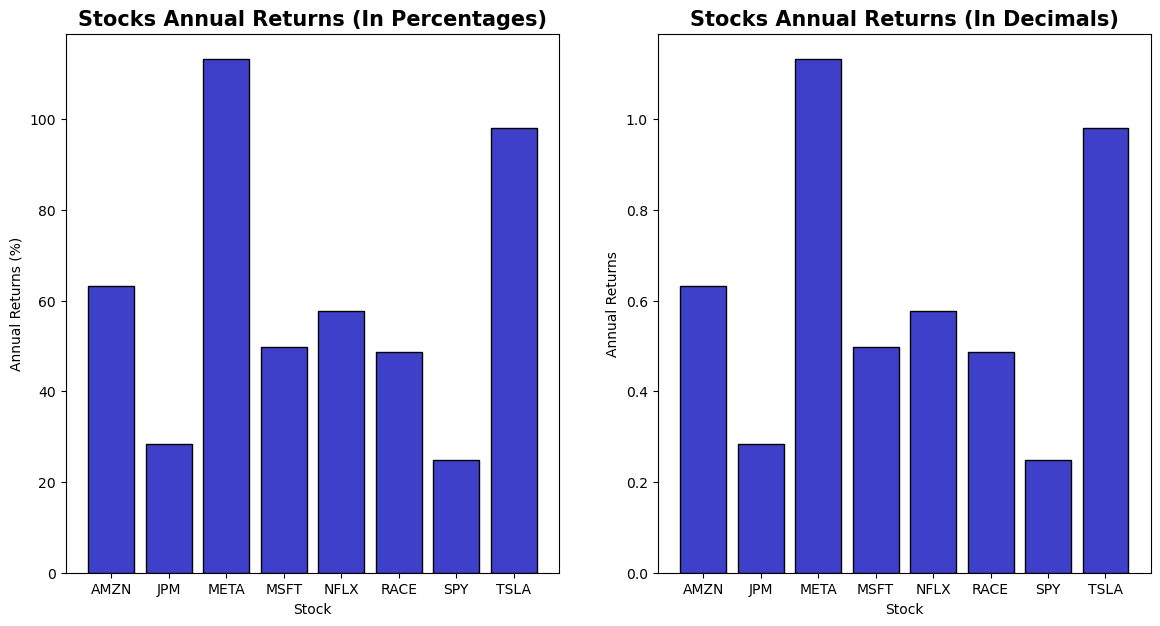

In [19]:
# Visualising the annual returns of each stock in both formats
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.bar(annual_returns.keys(), annual_returns, color='#3e40ca', edgecolor='black')
plt.title('Stocks Annual Returns (In Percentages)', fontsize=15, fontweight='bold')
plt.xlabel('Stock')
plt.ylabel('Annual Returns (%)')

plt.subplot(1,2,2)
plt.bar(annual_returns_decimal.keys(), annual_returns_decimal, color='#3e40ca', edgecolor='black')
plt.title('Stocks Annual Returns (In Decimals)', fontsize=15, fontweight='bold')
plt.xlabel('Stock')
plt.ylabel('Annual Returns')
plt.show()

# Variance In Daily Simple Return

In [20]:
# Calculating the variance in the daily simple returns for each stock
daily_returns_var = daily_returns.var()
daily_returns_var

Ticker
AMZN     4.328420
JPM      1.713002
META     6.295012
MSFT     2.504095
NFLX     5.605980
RACE     1.805010
SPY      0.680104
TSLA    10.999577
dtype: float64

In [21]:
# Calculating the variance in the daily simple returns in decimal format for each stock
daily_returns_var_decimal = daily_returns_decimal.var()

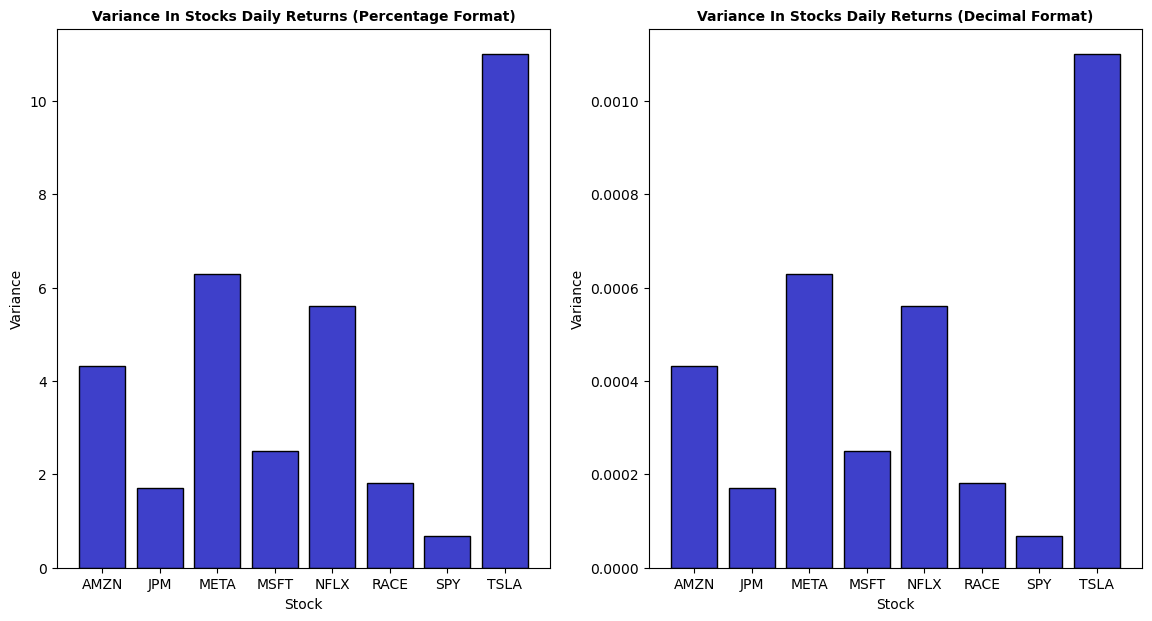

In [22]:
# Visualising the variance in the daily simple returns for each stock in both formats
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.bar(daily_returns_var.keys(), daily_returns_var, color='#3e40ca', edgecolor='black')
plt.title('Variance In Stocks Daily Returns (Percentage Format)', fontsize=10, fontweight='bold')
plt.xlabel('Stock')
plt.ylabel('Variance')

plt.subplot(1,2,2)
plt.bar(daily_returns_var_decimal.keys(), daily_returns_var_decimal, color='#3e40ca', edgecolor='black')
plt.title('Variance In Stocks Daily Returns (Decimal Format)', fontsize=10, fontweight='bold')
plt.xlabel('Stock')
plt.ylabel('Variance')
plt.show()

# STD In Daily Simple Return

In [23]:
# Calculating the std in the daily simple returns for each stock
daily_returns_std = daily_returns.std()
daily_returns_std

Ticker
AMZN    2.080485
JPM     1.308817
META    2.508986
MSFT    1.582433
NFLX    2.367695
RACE    1.343507
SPY     0.824684
TSLA    3.316561
dtype: float64

In [24]:
# Calculating the std in the daily simple returns decimal foramt for each stock
daily_returns_decimal_std = daily_returns_decimal.std()

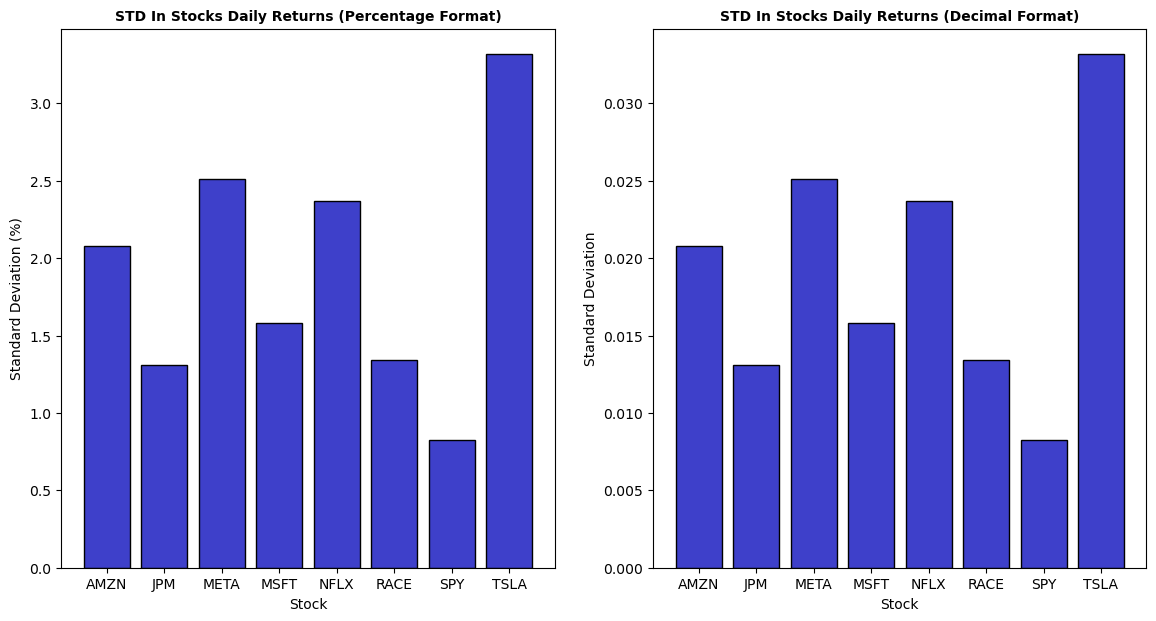

In [25]:
# Visualising the std in the daily simple returns for each stock
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.bar(daily_returns_std.keys(), daily_returns_std, color='#3e40ca', edgecolor='black')
plt.title('STD In Stocks Daily Returns (Percentage Format)', fontsize=10, fontweight='bold')
plt.xlabel('Stock')
plt.ylabel('Standard Deviation (%)')

plt.subplot(1,2,2)
plt.bar(daily_returns_decimal_std.keys(), daily_returns_decimal_std, color='#3e40ca', edgecolor='black')
plt.title('STD In Stocks Daily Returns (Decimal Format)', fontsize=10, fontweight='bold')
plt.xlabel('Stock')
plt.ylabel('Standard Deviation')
plt.show()

# Covariance In Daily Simple Returns

In [26]:
# Calculating the covariance between the daily simple returns of each stock in percentages
daily_returns_cov = daily_returns.cov()
daily_returns_cov
# Values are inflated by 10,000 times due to using percentage format

Ticker,AMZN,JPM,META,MSFT,NFLX,RACE,SPY,TSLA
Ticker,,,,,,,,
AMZN,4.328420,0.350124,3.026184,1.896088,1.832722,1.086172,1.045355,2.573681
JPM,0.350124,1.713002,0.639736,0.183980,0.477629,0.560377,0.595207,1.298993
META,3.026184,0.639736,6.295012,2.113190,1.917320,1.437518,1.205772,3.152225
MSFT,1.896088,0.183980,2.113190,2.504095,1.453847,0.742511,0.797249,1.668467
NFLX,1.832722,0.477629,1.917320,1.453847,5.605980,0.797234,0.896761,2.126963
RACE,1.086172,0.560377,1.437518,0.742511,0.797234,1.805010,0.649230,2.075374
SPY,1.045355,0.595207,1.205772,0.797249,0.896761,0.649230,0.680104,1.504685
TSLA,2.573681,1.298993,3.152225,1.668467,2.126963,2.075374,1.504685,10.999577


In [27]:
# Calculating the covariance between the daily simple returns of each stock ind decimals
daily_returns_decimal_cov = daily_returns_decimal.cov()

# Risk Free Rate

In [28]:
# Current 3-month U.S. Treasury yield annual risk free rate is 5%
annual_risk_free_rate = 0.05
daily_risk_free_rate = round((1 + annual_risk_free_rate) ** (1 / 252) - 1, 5)
daily_risk_free_rate

0.00019

# Generating Random Portfolios

In [29]:
# Creating a function that will generate a selection of random portfolios with different weights for each stock
# The dictionary created contains the daily info for each portfolio

def generate_random_portfolios(returns, cov_matrix, num_portfolios=10000, risk_free_rate = daily_risk_free_rate):
    
    # Ensuring that the data is in numerical format
    returns = np.array(returns, dtype=np.float64)
    cov_matrix = np.array(cov_matrix, dtype=np.float64)
    
    # Getting the number of stocks to create portfolios out of
    num_stocks = len(returns)
    
    # Creating empty lists to store the portfolio data
    portfolio_returns = []
    portfolio_volatility = []
    portfolio_weights = []
    sharpe_ratios = []
    
    # Making sure the same selection of random numbers are selected each time the function is run
    np.random.seed(42)
        
    # Iterating through the selected amount of portfolios
    for _ in range(num_portfolios):
        # Generating random weights
        weights = np.random.random(num_stocks)
        # Ensuring the weights sum to 1
        weights /= np.sum(weights)
        
        # Calculating the portfolio return, weighted average
        portfolio_return = np.dot(weights, returns)
        
        # Calculating the portfolio volatility, variance from the covariance matrix
        portfolio_var = np.dot(weights.T, np.dot(cov_matrix, weights))
        portfolio_std = np.sqrt(portfolio_var)
        
        # Calculating the sharpe ratio
        sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_std
        
        # Storing results in the lists
        portfolio_returns.append(portfolio_return)
        portfolio_volatility.append(portfolio_std)
        portfolio_weights.append(weights)
        sharpe_ratios.append(sharpe_ratio)
        
    # Creating a dictionary to store all the results
    portfolios = {'Returns':np.array(portfolio_returns), 
                  'Volatility':np.array(portfolio_volatility),
                  'Weights':np.array(portfolio_weights), 
                  'Sharpe_Ratio':np.array(sharpe_ratios)}
        
    return portfolios

In [30]:
# Generating random portfolios with percentage inputs of the stock data
random_portfolios = generate_random_portfolios(mean_daily_returns, daily_returns_cov)  

# Inspecting the data for the first random portfolio
print(random_portfolios['Returns'][:1])
print(random_portfolios['Volatility'][:1])
print(random_portfolios['Weights'][:1])
print(random_portfolios['Sharpe_Ratio'][:1])

[0.27158084]
[1.48834007]
[[0.09622888 0.24426269 0.18806787 0.15381059 0.04008516 0.04007896
  0.01492316 0.22254269]]
[0.18234465]


In [31]:
# Generating random portfolios with decimal inputs of the stock data
random_portfolios_decimal = generate_random_portfolios(mean_daily_returns_decimal, daily_returns_decimal_cov)  

# Inspecting the data for the first random portfolio
print(random_portfolios_decimal['Returns'][:1])
print(random_portfolios_decimal['Volatility'][:1])
print(random_portfolios_decimal['Weights'][:1])
print(random_portfolios_decimal['Sharpe_Ratio'][:1])

[0.00271581]
[0.0148834]
[[0.09622888 0.24426269 0.18806787 0.15381059 0.04008516 0.04007896
  0.01492316 0.22254269]]
[0.16970641]


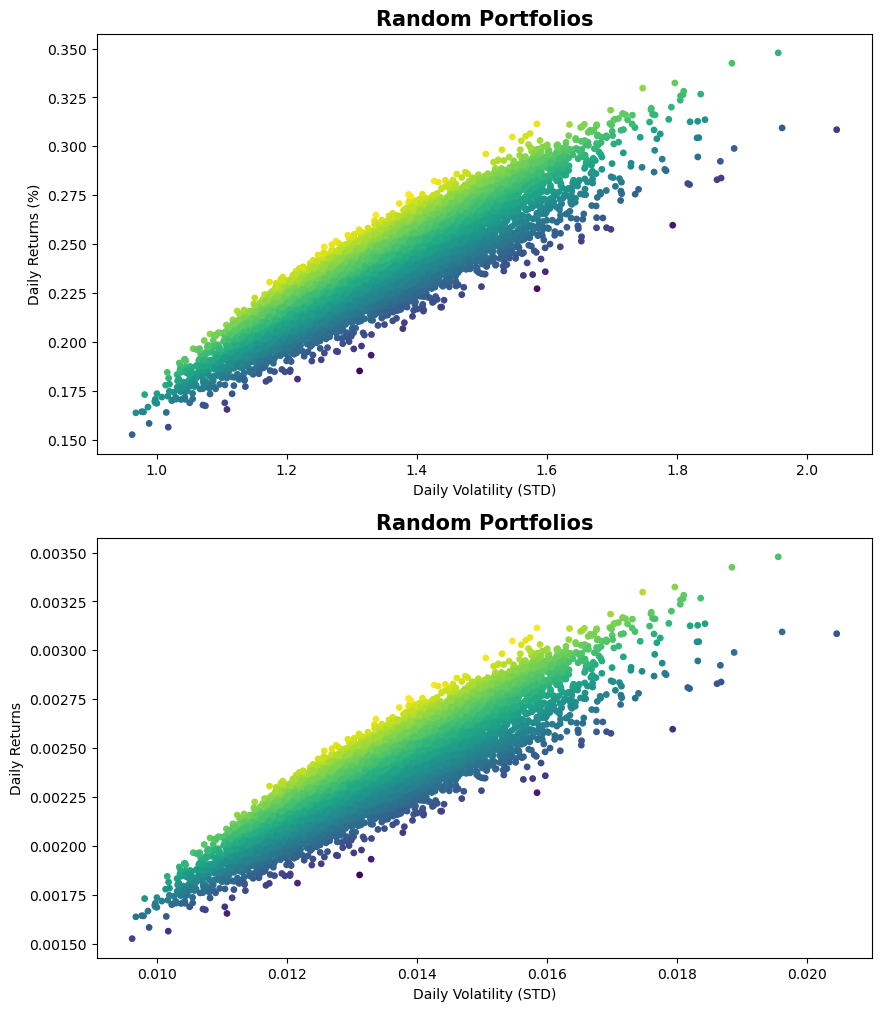

In [32]:
# Visualising the distribution of the random portfolios in both percentage and decimal format
plt.figure(figsize=(10,12))
plt.subplot(2,1,1)
plt.scatter(random_portfolios['Volatility'], random_portfolios['Returns'], s=15, c=random_portfolios['Sharpe_Ratio'], 
            cmap='viridis')
plt.title('Random Portfolios', fontsize=15, fontweight='bold')
plt.xlabel('Daily Volatility (STD)')
plt.ylabel('Daily Returns (%)')

plt.subplot(2,1,2)
plt.scatter(random_portfolios_decimal['Volatility'], random_portfolios_decimal['Returns'], 
            s=15, c=random_portfolios_decimal['Sharpe_Ratio'], cmap='viridis')
plt.title('Random Portfolios', fontsize=15, fontweight='bold')
plt.xlabel('Daily Volatility (STD)')
plt.ylabel('Daily Returns')
plt.show()

# Efficient Frontier

In [33]:
# Finding the min and max return from the random portfolios
min_return = random_portfolios['Returns'].min()
max_return = random_portfolios['Returns'].max()

# Selecting a number of points between the min/max returns for the efficient frontier 
target_returns = np.linspace(min_return, max_return, 1000)

In [34]:
# Finding the min and max return from the random portfolios in decimal format
min_return_decimal = random_portfolios_decimal['Returns'].min()
max_return_decimal = random_portfolios_decimal['Returns'].max()

# Selecting a number of points between the min/max returns for the efficient frontier 
target_returns_decimal = np.linspace(min_return_decimal, max_return_decimal, 1000)

In [35]:
# Creating a function to calculate the efficient frontier for the random portfolios

def efficient_frontier(returns, cov_matrix, target_returns, risk_free_rate = daily_risk_free_rate):
    
    # Ensuring that the data is in numerical format
    returns = np.array(returns, dtype=np.float64)
    cov_matrix = np.array(cov_matrix, dtype=np.float64)
    
    # Getting the number of stocks
    num_stocks = len(returns)
    
    # Creating empty lists to store the data
    efficient_returns = []
    efficient_volatilities = []
    efficient_weights = []
    efficient_sharpe_ratio = []
    
    # Creating a function to calculate the portfolio volatility
    def portfolio_volatility(weights):
        return np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    
    # Iterating throught predetermined amount of points along the efficient frontier
    for target_return in target_returns:
        # Creating constraints for each efficient frontier portfolio, weights sum to 1 and portfolio return matches target return
        constraints = ({'type': 'eq', 'fun': lambda w: np.sum(w) - 1},
                       {'type': 'eq', 'fun': lambda w: float(np.dot(w, returns) - target_return)})
        
        # Creating bounds for weights, making sure they are between 0,1
        bounds = tuple((0, 1) for _ in range(num_stocks))
    
        # Initial weight guess, all stocks with equal weight distribution
        initial_weights = np.array(num_stocks * [1.0 / num_stocks])
    
        # Optimizing the portfolio by minimising the volatility for each target return
        optimized_result = minimize(portfolio_volatility, initial_weights, bounds=bounds, constraints=constraints)
    
        # If the optimized portfolio has been found the sharpe ratio will be calculated and data will be added to the lists
        if optimized_result.success:
            weights = optimized_result.x
            portfolio_vol = portfolio_volatility(weights)
            portfolio_return = target_return
            sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_vol
                                           
            efficient_returns.append(portfolio_return)
            efficient_volatilities.append(portfolio_vol)
            efficient_weights.append(weights)
            efficient_sharpe_ratio.append(sharpe_ratio)
           
        
    # Storing the efficient frontier portfolios in a dictionary
    efficient_portfolios = {'Efficient_Returns':np.array(efficient_returns), 
                            'Efficient_Volatility':np.array(efficient_volatilities),
                            'Efficient_Weights':np.array(efficient_weights),
                            'Efficient_Sharpe_Ratio':np.array(efficient_sharpe_ratio)}
    
    
    return efficient_portfolios

In [36]:
# Generating the portfolios that make up the efficient frontier
efficient_portfolios = efficient_frontier(mean_daily_returns, daily_returns_cov, target_returns)  

# Inspecting the data for the first efficient frontier portfolio
print(efficient_portfolios['Efficient_Returns'][:1])
print(efficient_portfolios['Efficient_Volatility'][:1])
print(efficient_portfolios['Efficient_Weights'][:1])
print(efficient_portfolios['Efficient_Sharpe_Ratio'][:1])

[0.15262583]
[0.91276913]
[[1.41829641e-17 1.72426739e-01 5.42503589e-02 1.02160601e-01
  2.08654246e-02 2.08684890e-01 4.41611986e-01 0.00000000e+00]]
[0.1670037]


In [37]:
# Generating the portfolios that make up the efficient frontier in decimal format
efficient_portfolios_decimal = efficient_frontier(mean_daily_returns_decimal, daily_returns_decimal_cov, target_returns_decimal)  

# Inspecting the data for the first efficient frontier portfolio
print(efficient_portfolios_decimal['Efficient_Returns'][:1])
print(efficient_portfolios_decimal['Efficient_Volatility'][:1])
print(efficient_portfolios_decimal['Efficient_Weights'][:1])
print(efficient_portfolios_decimal['Efficient_Sharpe_Ratio'][:1])

[0.00152626]
[0.00914408]
[[1.37996408e-17 1.89532662e-01 3.67097759e-02 1.36518186e-01
  2.00686962e-02 2.36286492e-01 3.80884187e-01 2.41480277e-19]]
[0.14613373]


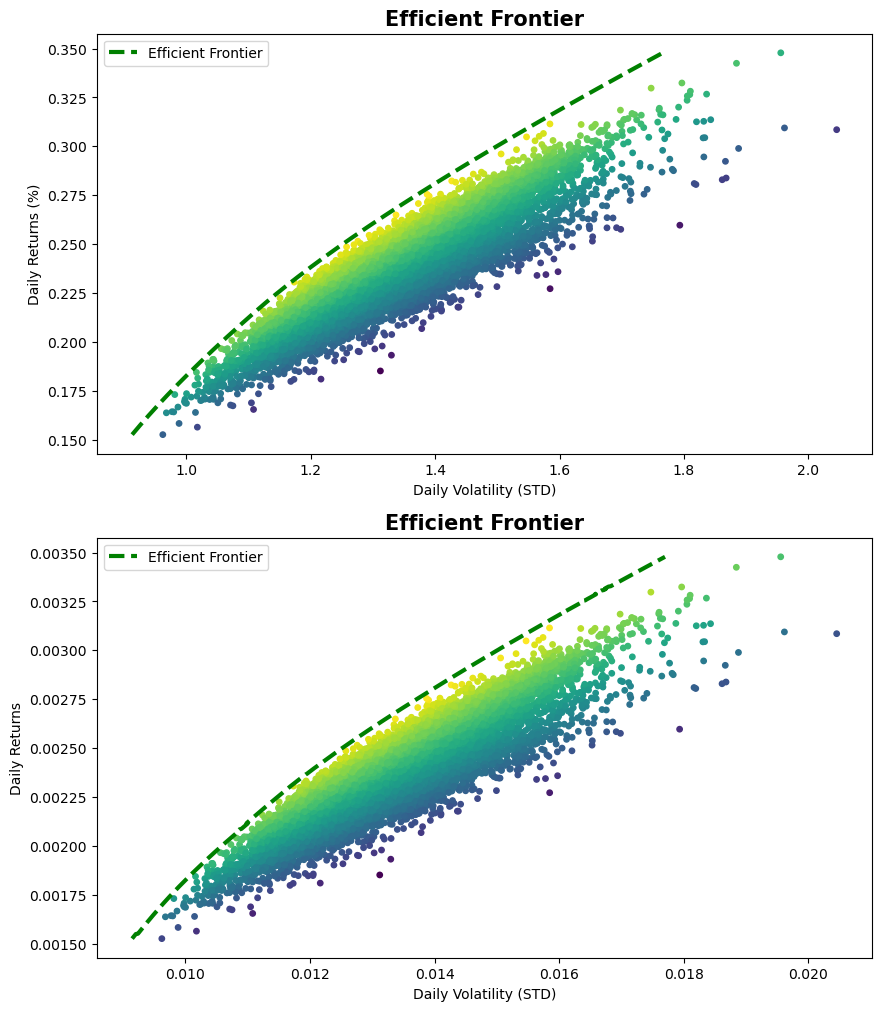

In [38]:
# Visualising the efficient frontier with the random portfolios
plt.figure(figsize=(10,12))
plt.subplot(2,1,1)
plt.scatter(random_portfolios['Volatility'], random_portfolios['Returns'], c=random_portfolios['Sharpe_Ratio'], 
            cmap='viridis', s=15)
plt.plot(efficient_portfolios['Efficient_Volatility'], efficient_portfolios['Efficient_Returns'], 'g--', linewidth=3, 
         label='Efficient Frontier')
plt.title('Efficient Frontier', fontsize=15, fontweight='bold')
plt.xlabel('Daily Volatility (STD)')
plt.ylabel('Daily Returns (%)')
plt.legend()

plt.subplot(2,1,2)
plt.scatter(random_portfolios_decimal['Volatility'], random_portfolios_decimal['Returns'], 
            c=random_portfolios_decimal['Sharpe_Ratio'], cmap='viridis', s=15)
plt.plot(efficient_portfolios_decimal['Efficient_Volatility'], efficient_portfolios_decimal['Efficient_Returns'], 'g--', 
         linewidth=3, label='Efficient Frontier')
plt.title('Efficient Frontier', fontsize=15, fontweight='bold')
plt.xlabel('Daily Volatility (STD)')
plt.ylabel('Daily Returns')
plt.legend()
plt.show()

# Additional Stocks

In [39]:
# Creating a list of symbols of the stocks I will be using
symbols_2 = ['MSFT', 'AMZN', 'RACE', 'JPM', 'TSLA', 'NFLX', 'SPY', 'META', 'NVDA', 'AMD']

In [40]:
# Collecting the stock data
stock_data_2 = yf.download(symbols_2, start=start_date, end=end_date)
stock_data_2.head()

[*********************100%***********************]  10 of 10 completed


Price       Adj Close                                                 \
Ticker            AMD       AMZN         JPM        META        MSFT   
Date                                                                   
2023-01-03  64.019997  85.820000  127.490311  124.265312  235.711716   
2023-01-04  64.660004  85.139999  128.679199  126.885307  225.400909   
2023-01-05  62.330002  83.120003  128.650681  126.456947  218.720566   
2023-01-06  63.959999  86.080002  131.112442  129.525223  221.298264   
2023-01-09  67.239998  87.360001  130.570679  128.977310  223.452866   

Price                                                                  ...  \
Ticker            NFLX       NVDA        RACE         SPY        TSLA  ...   
Date                                                                   ...   
2023-01-03  294.950012  14.304596  212.466675  370.367889  108.099998  ...   
2023-01-04  309.410004  14.738279  216.708725  373.227234  113.639999  ...   
2023-01-05  309.700012  14.254632  213.167130  368.967438  110.339996  ...   
2023-01-06  315.549988  14.848202  221.059280  377.428589  113.059998  ...   
2023-01-09  315.170013  15.616641  225.686066  377.214661  119.769997  ...   

Price         Volume                                                   \
Ticker           AMD      AMZN       JPM      META      MSFT     NFLX   
Date                                                                    
2023-01-03  46851800  76706000  11054800  35528500  25740000  6764000   
2023-01-04  47477100  68885100  11687600  32397100  50623400  9345100   
2023-01-05  46159500  67930800   8381300  25447100  39585600  8328400   
2023-01-06  70161300  83303400  10029100  27584500  43613600  8959800   
2023-01-09  69741300  65266100   8482300  26649100  27369800  6766600   

Price                                                
Ticker           NVDA    RACE        SPY       TSLA  
Date                                                 
2023-01-03  401277000  316400   74850700  231402800  
2023-01-04  431324000  354700   85934100  180389000  
2023-01-05  389168000  205900   76970500  157986300  
2023-01-06  405044000  212900  104189600  220911100  
2023-01-09  504231000  564700   73978100  190284000  

[5 rows x 60 columns]

# Adjusted Closing Prices

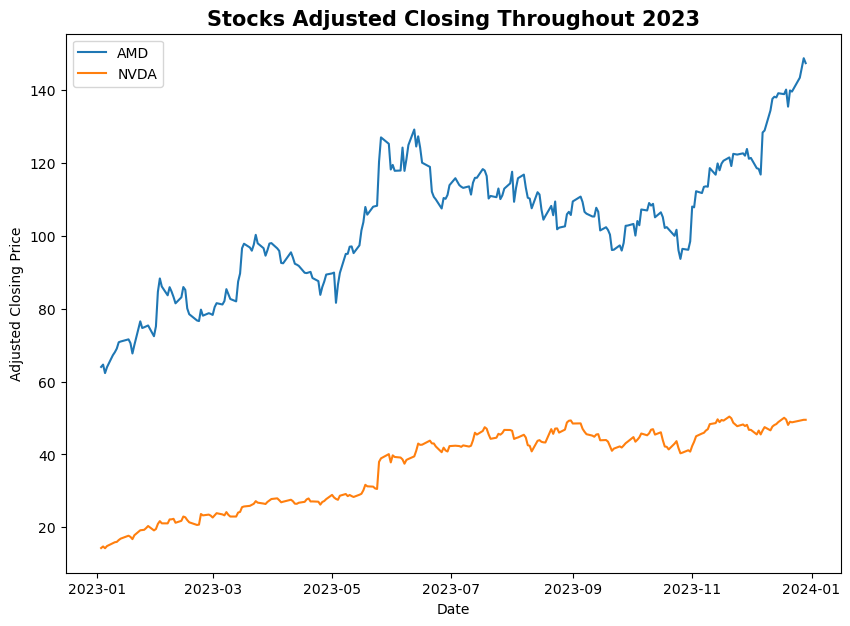

In [41]:
# Visualising the adjusted closing prices through the year for the new stocks
plt.figure(figsize=(10,7))
plt.plot(stock_data_2['Adj Close']['AMD'])
plt.plot(stock_data_2['Adj Close']['NVDA'])
plt.title('Stocks Adjusted Closing Throughout 2023', fontsize=15, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price')
plt.legend(['AMD', 'NVDA'])
plt.show()

# Daily Simple Returns

In [42]:
# Calculating the daily simple return for each stock in percentage format
daily_returns_2 = stock_data_2['Adj Close'].pct_change() * 100

In [43]:
# Calculating the daily simple return for each stock in decimal format
daily_returns_decimal_2 = stock_data_2['Adj Close'].pct_change() 

In [44]:
# Getting the daily simple ror for the new stocks in percentage format
amd_daily_returns = stock_data_2['Adj Close']['AMD'].pct_change() * 100
nvda_daily_returns = stock_data_2['Adj Close']['NVDA'].pct_change() * 100

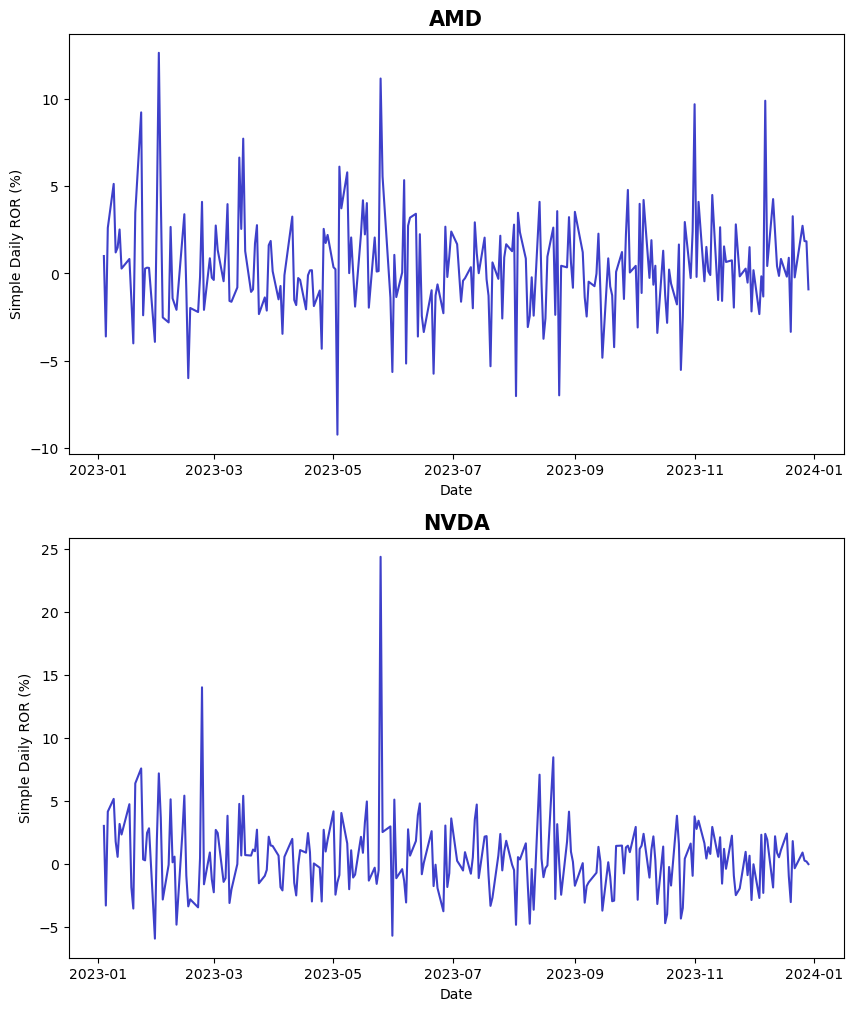

In [45]:
# Visualising the daily simple ror for the new stocks
plt.figure(figsize=(10,12))
plt.subplot(2,1,1)
plt.plot(amd_daily_returns, c='#3e40ca')
plt.title('AMD', fontsize=15, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Simple Daily ROR (%)')

plt.subplot(2,1,2)
plt.plot(nvda_daily_returns, c='#3e40ca')
plt.title('NVDA', fontsize=15, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Simple Daily ROR (%)')
plt.show()

# Mean Simple Daily Returns

In [46]:
# Calculating the mean daily returns for the stocks
mean_daily_returns_2 = daily_returns_2.mean()
mean_daily_returns_2

Ticker
AMD     0.378504
AMZN    0.251149
JPM     0.112830
META    0.449317
MSFT    0.197166
NFLX    0.228751
NVDA    0.544180
RACE    0.193503
SPY     0.098500
TSLA    0.389272
dtype: float64

In [47]:
# Calculating the mean daily returns for the stocks in decimal format
mean_daily_returns_decimal_2 = daily_returns_decimal_2.mean()

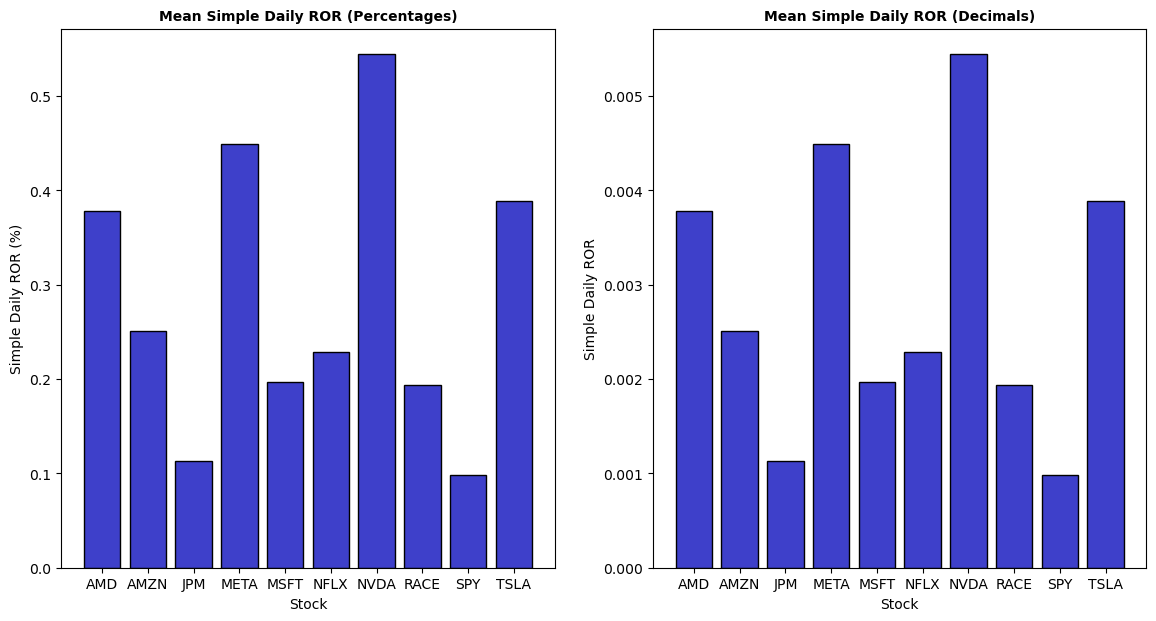

In [48]:
# Visualising the mean daily simple return for each stock
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.bar(mean_daily_returns_2.keys(), mean_daily_returns_2, color='#3e40ca', edgecolor='black')
plt.title('Mean Simple Daily ROR (Percentages)', fontsize=10, fontweight='bold')
plt.xlabel('Stock')
plt.ylabel('Simple Daily ROR (%)')

plt.subplot(1,2,2)
plt.bar(mean_daily_returns_decimal_2.keys(), mean_daily_returns_decimal_2, color='#3e40ca', edgecolor='black')
plt.title('Mean Simple Daily ROR (Decimals)', fontsize=10, fontweight='bold')
plt.xlabel('Stock')
plt.ylabel('Simple Daily ROR')
plt.show()

# Annualised Returns

In [49]:
# Calculating the annual return for each stock based on their mean daily return
annual_returns_2 = mean_daily_returns_2 * 252
annual_returns_2

Ticker
AMD      95.382991
AMZN     63.289659
JPM      28.433242
META    113.227815
MSFT     49.685850
NFLX     57.645161
NVDA    137.133314
RACE     48.762638
SPY      24.821914
TSLA     98.096609
dtype: float64

In [50]:
# Calculating the annual return in decimal format for each stock based on their mean daily return
annual_returns_decimal_2 = mean_daily_returns_decimal_2 * 252

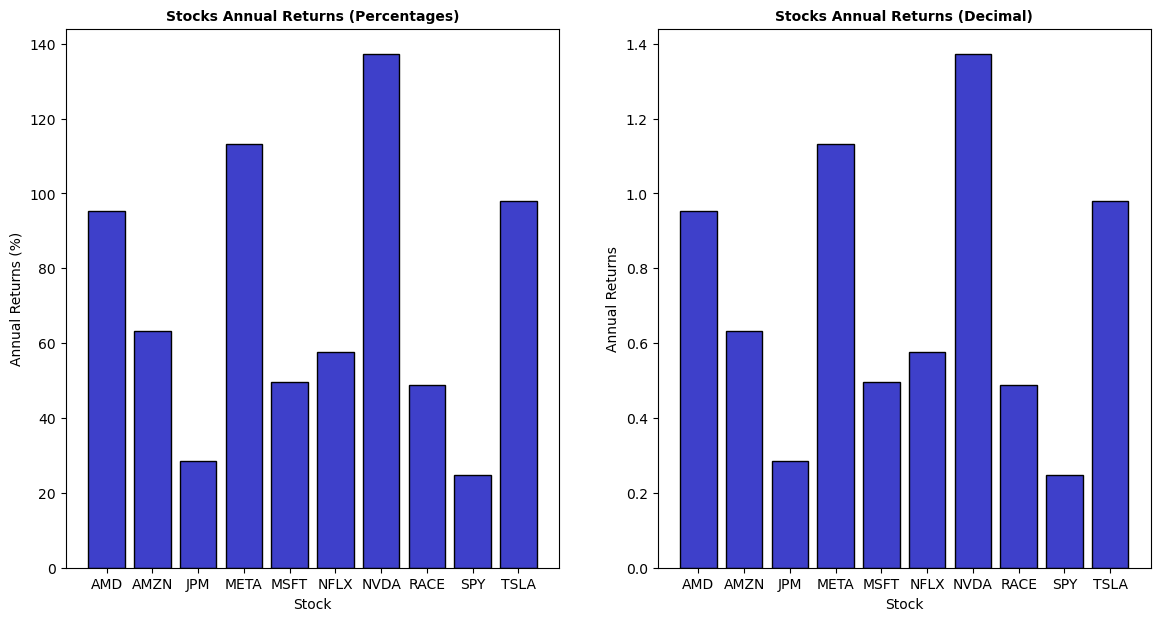

In [51]:
# Visualising the annual returns of each stock
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.bar(annual_returns_2.keys(), annual_returns_2, color='#3e40ca', edgecolor='black')
plt.title('Stocks Annual Returns (Percentages)', fontsize=10, fontweight='bold')
plt.xlabel('Stock')
plt.ylabel('Annual Returns (%)')

plt.subplot(1,2,2)
plt.bar(annual_returns_decimal_2.keys(), annual_returns_decimal_2, color='#3e40ca', edgecolor='black')
plt.title('Stocks Annual Returns (Decimal)', fontsize=10, fontweight='bold')
plt.xlabel('Stock')
plt.ylabel('Annual Returns')
plt.show()

# Variance In Daily Simple Returns

In [52]:
# Calculating the variance in the daily simple returns for each stock
daily_returns_var_2 = daily_returns_2.var()
daily_returns_var_2

Ticker
AMD      8.743363
AMZN     4.328420
JPM      1.713002
META     6.295012
MSFT     2.504095
NFLX     5.605980
NVDA     9.317631
RACE     1.805010
SPY      0.680104
TSLA    10.999577
dtype: float64

In [53]:
# Calculating the variance in the daily simple returns for each stock in decimal format
daily_returns_var_decimal_2 = daily_returns_decimal_2.var()

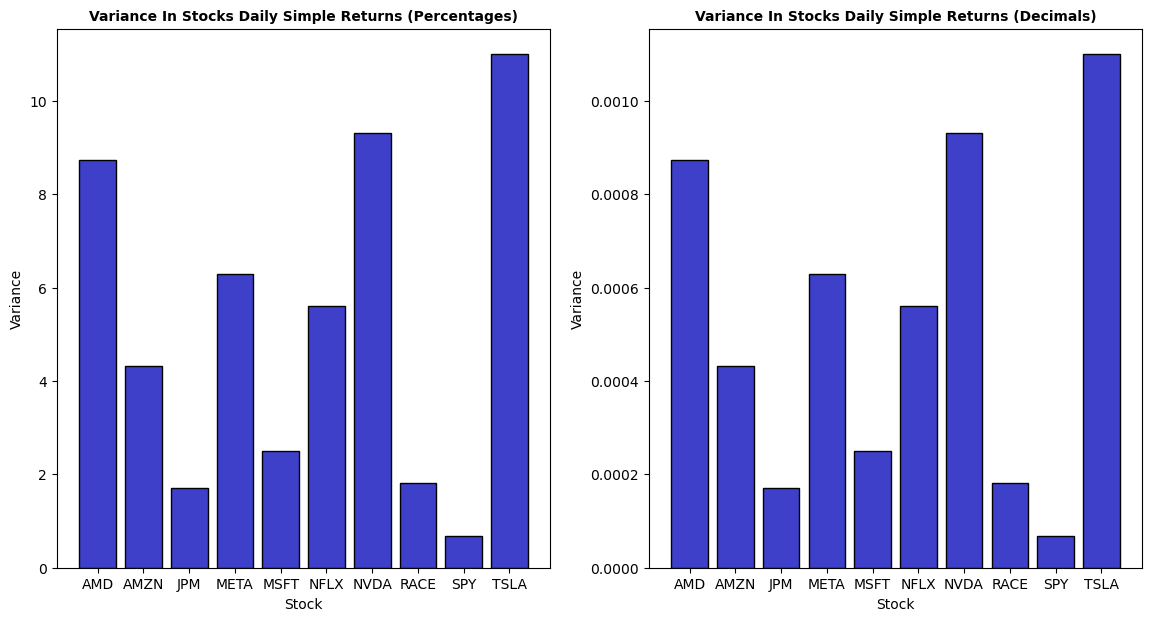

In [54]:
# Visualising the variance in the daily simple returns for each stock
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.bar(daily_returns_var_2.keys(), daily_returns_var_2, color='#3e40ca', edgecolor='black')
plt.title('Variance In Stocks Daily Simple Returns (Percentages)', fontsize=10, fontweight='bold')
plt.xlabel('Stock')
plt.ylabel('Variance')

plt.subplot(1,2,2)
plt.bar(daily_returns_var_decimal_2.keys(), daily_returns_var_decimal_2, color='#3e40ca', edgecolor='black')
plt.title('Variance In Stocks Daily Simple Returns (Decimals)', fontsize=10, fontweight='bold')
plt.xlabel('Stock')
plt.ylabel('Variance')
plt.show()

# STD In Daily Simple Returns

In [55]:
# Calculating the std in the daily simple returns for each stock
daily_returns_std_2 = daily_returns_2.std()
daily_returns_std_2

Ticker
AMD     2.956918
AMZN    2.080485
JPM     1.308817
META    2.508986
MSFT    1.582433
NFLX    2.367695
NVDA    3.052479
RACE    1.343507
SPY     0.824684
TSLA    3.316561
dtype: float64

In [56]:
# Calculating the std in the daily simple returns for each stock in decimal format
daily_returns_std_decimal_2 = daily_returns_decimal_2.std()

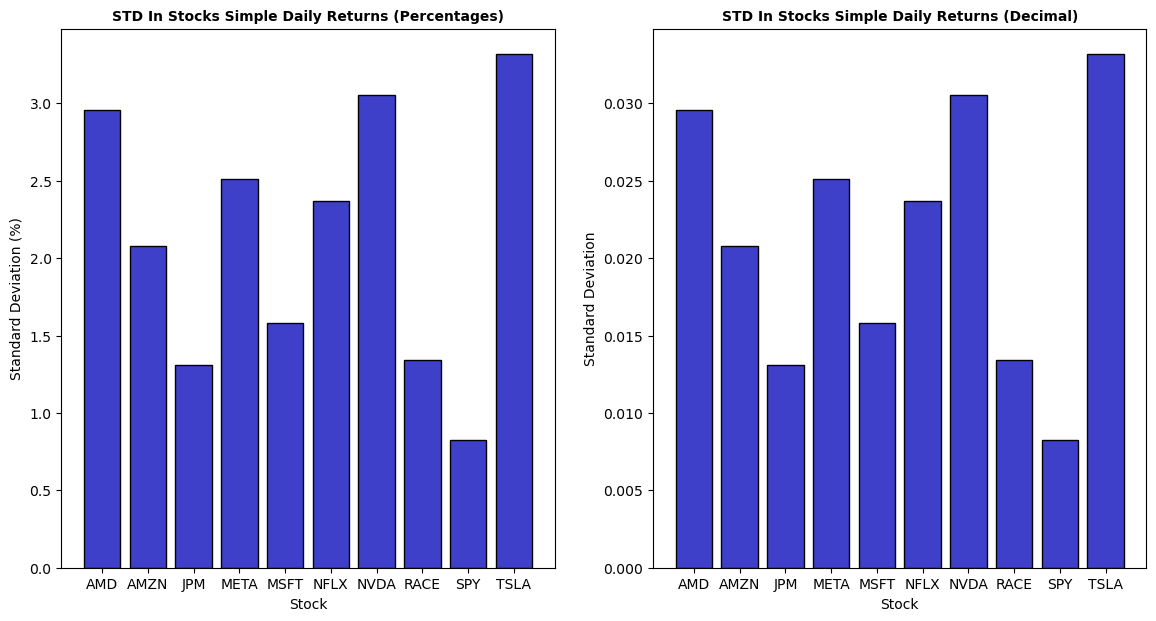

In [57]:
# Visualising the std in the daily simple returns for each stock
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.bar(daily_returns_std_2.keys(), daily_returns_std_2, color='#3e40ca', edgecolor='black')
plt.title('STD In Stocks Simple Daily Returns (Percentages)', fontsize=10, fontweight='bold')
plt.xlabel('Stock')
plt.ylabel('Standard Deviation (%)')

plt.subplot(1,2,2)
plt.bar(daily_returns_std_decimal_2.keys(), daily_returns_std_decimal_2, color='#3e40ca', edgecolor='black')
plt.title('STD In Stocks Simple Daily Returns (Decimal)', fontsize=10, fontweight='bold')
plt.xlabel('Stock')
plt.ylabel('Standard Deviation')
plt.show()

# Covariance In Daily Simple Returns

In [58]:
# Calculating the covariance between the daily simple returns in percentage format for each stock
daily_returns_cov_2 = daily_returns_2.cov()
daily_returns_cov_2

Ticker,AMD,AMZN,JPM,META,MSFT,NFLX,NVDA,RACE,SPY,TSLA
Ticker,,,,,,,,,,
AMD,8.743363,3.009118,0.700440,3.249282,2.481622,2.539107,6.037386,1.501170,1.320163,3.397411
AMZN,3.009118,4.328420,0.350124,3.026184,1.896088,1.832722,2.415858,1.086172,1.045355,2.573681
JPM,0.700440,0.350124,1.713002,0.639736,0.183980,0.477629,0.970124,0.560377,0.595207,1.298993
META,3.249282,3.026184,0.639736,6.295012,2.113190,1.917320,3.145809,1.437518,1.205772,3.152225
MSFT,2.481622,1.896088,0.183980,2.113190,2.504095,1.453847,2.595975,0.742511,0.797249,1.668467
NFLX,2.539107,1.832722,0.477629,1.917320,1.453847,5.605980,2.208619,0.797234,0.896761,2.126963
NVDA,6.037386,2.415858,0.970124,3.145809,2.595975,2.208619,9.317631,1.565315,1.373257,4.133251
RACE,1.501170,1.086172,0.560377,1.437518,0.742511,0.797234,1.565315,1.805010,0.649230,2.075374
SPY,1.320163,1.045355,0.595207,1.205772,0.797249,0.896761,1.373257,0.649230,0.680104,1.504685


In [59]:
# Calculating the covariance between the daily simple returns in decimal format for each stock
daily_returns_cov_decimal_2 = daily_returns_decimal_2.cov()

# Generating Random Portfolios #2

In [60]:
# Generating random portfolios in both percentage and decimal format
random_portfolios_2 = generate_random_portfolios(mean_daily_returns_2, daily_returns_cov_2)

random_portfolios_decimal_2 = generate_random_portfolios(mean_daily_returns_decimal_2, daily_returns_cov_decimal_2)

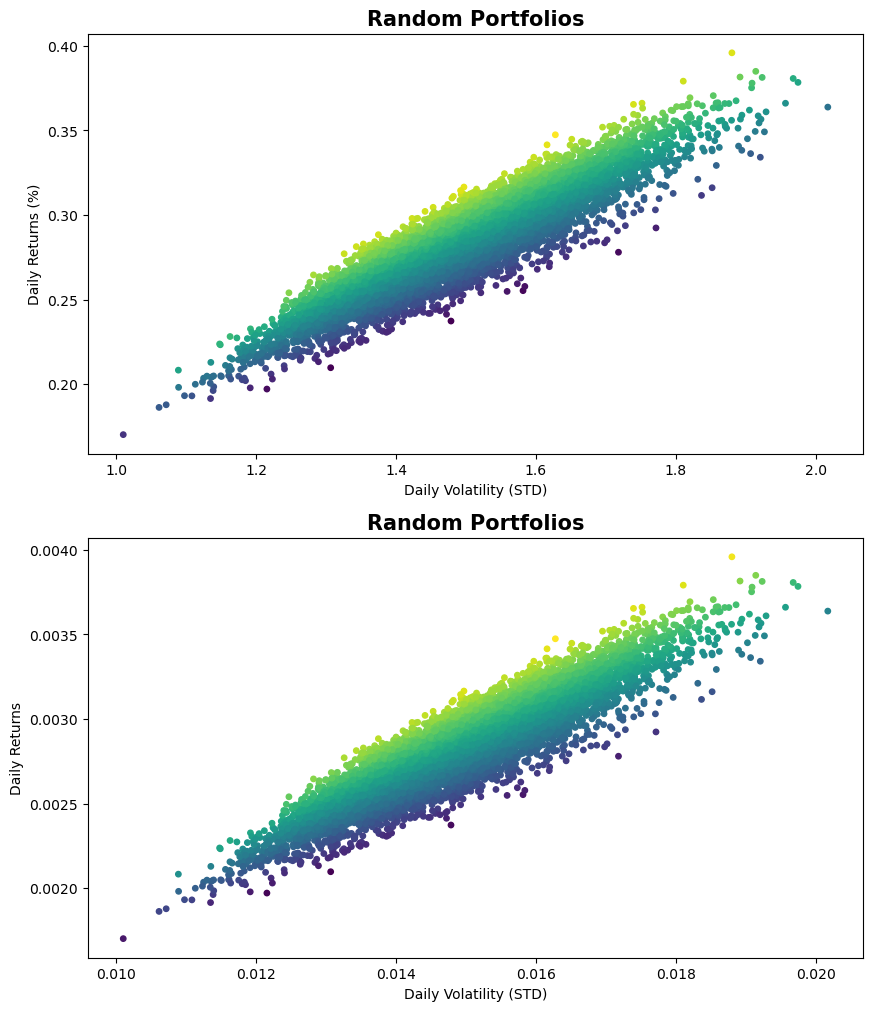

In [61]:
# Visualising the distribution of the random portfolios in both formats
plt.figure(figsize=(10,12))
plt.subplot(2,1,1)
plt.scatter(random_portfolios_2['Volatility'], random_portfolios_2['Returns'], s=15, c=random_portfolios_2['Sharpe_Ratio'], 
            cmap='viridis')
plt.title('Random Portfolios', fontsize=15, fontweight='bold')
plt.xlabel('Daily Volatility (STD)')
plt.ylabel('Daily Returns (%)')

plt.subplot(2,1,2)
plt.scatter(random_portfolios_decimal_2['Volatility'], random_portfolios_decimal_2['Returns'], s=15, 
            c=random_portfolios_decimal_2['Sharpe_Ratio'], cmap='viridis')
plt.title('Random Portfolios', fontsize=15, fontweight='bold')
plt.xlabel('Daily Volatility (STD)')
plt.ylabel('Daily Returns')
plt.show()

# Efficient Frontier 1 & 2

In [62]:
# Finding the min and max return from the random portfolios
min_return_2 = random_portfolios_2['Returns'].min()
max_return_2 = random_portfolios_2['Returns'].max()

# Selecting a number of points between the min/max returns for the efficient frontier 
target_returns_2 = np.linspace(min_return_2, max_return_2, 1000)

In [63]:
# Finding the min and max return from the random portfolios in decimal format
min_return_decimal_2 = random_portfolios_decimal_2['Returns'].min()
max_return_decimal_2 = random_portfolios_decimal_2['Returns'].max()

# Selecting a number of points between the min/max returns for the efficient frontier 
target_returns_decimal_2 = np.linspace(min_return_decimal_2, max_return_decimal_2, 1000)

In [64]:
# Generating the portfolios that make up the efficient frontier in percentage format
efficient_portfolios_2 = efficient_frontier(mean_daily_returns_2, daily_returns_cov_2, target_returns_2)  

In [65]:
# Generating the portfolios that make up the efficient frontier in decimal format
efficient_portfolios_decimal_2 = efficient_frontier(mean_daily_returns_decimal_2, daily_returns_cov_decimal_2, 
                                                    target_returns_decimal_2)  

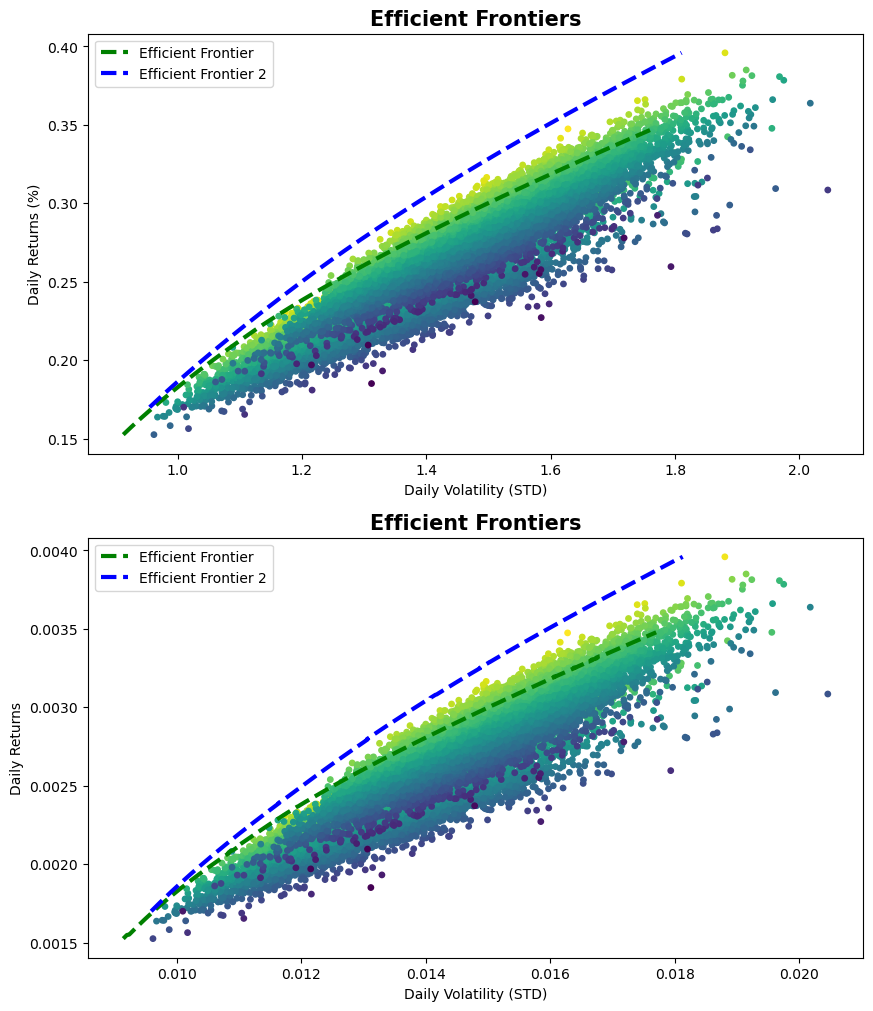

In [66]:
# Visualising the efficient frontier with the random portfolios for both percentage and decimal formats
plt.figure(figsize=(10,12))
plt.subplot(2,1,1)
plt.scatter(random_portfolios['Volatility'], random_portfolios['Returns'], c=random_portfolios['Sharpe_Ratio'], cmap='viridis', s=15)
plt.scatter(random_portfolios_2['Volatility'], random_portfolios_2['Returns'], c=random_portfolios_2['Sharpe_Ratio'], cmap='viridis', s=15)

plt.plot(efficient_portfolios['Efficient_Volatility'], efficient_portfolios['Efficient_Returns'], 'g--', linewidth=3, label='Efficient Frontier')
plt.plot(efficient_portfolios_2['Efficient_Volatility'], efficient_portfolios_2['Efficient_Returns'], 'b--', linewidth=3, label='Efficient Frontier 2')

plt.title('Efficient Frontiers', fontsize=15, fontweight='bold')
plt.xlabel('Daily Volatility (STD)')
plt.ylabel('Daily Returns (%)')
plt.legend()

plt.subplot(2,1,2)
plt.scatter(random_portfolios_decimal['Volatility'], random_portfolios_decimal['Returns'], c=random_portfolios_decimal['Sharpe_Ratio'], cmap='viridis', s=15)
plt.scatter(random_portfolios_decimal_2['Volatility'], random_portfolios_decimal_2['Returns'], c=random_portfolios_decimal_2['Sharpe_Ratio'], cmap='viridis', s=15)

plt.plot(efficient_portfolios_decimal['Efficient_Volatility'], efficient_portfolios_decimal['Efficient_Returns'], 'g--', linewidth=3, label='Efficient Frontier')
plt.plot(efficient_portfolios_decimal_2['Efficient_Volatility'], efficient_portfolios_decimal_2['Efficient_Returns'], 'b--', linewidth=3, label='Efficient Frontier 2')

plt.title('Efficient Frontiers', fontsize=15, fontweight='bold')
plt.xlabel('Daily Volatility (STD)')
plt.ylabel('Daily Returns')
plt.legend()
plt.show()

# Portfolio Suggestions

# Risky Portfolio

In [67]:
# Finding the index of the portfolio that maximises the portfolio returns
max_returns_index = np.argmax(efficient_portfolios_2['Efficient_Returns'])
max_returns_index

999

In [68]:
# Using the index to get returns, volatility and stock weights
risky_portfolio_return = efficient_portfolios_2['Efficient_Returns'][max_returns_index]
risky_portfolio_vol = efficient_portfolios_2['Efficient_Volatility'][max_returns_index]
risky_portfolio_weights = efficient_portfolios_2['Efficient_Weights'][max_returns_index]
risky_portfolio_sharpe_ratio = efficient_portfolios_2['Efficient_Sharpe_Ratio'][max_returns_index]

In [69]:
# Highlighting the highest returning portfolios data for daily returns
print('Daily Portfolio Return : ' + str(round(risky_portfolio_return,5))+'%')
print('Daily Portfolio Volatility : ' + str(round(risky_portfolio_vol,5))+'%')
print('Stock weights : ' + str(list(zip(daily_returns_2.keys(), [round(i,5) for i in risky_portfolio_weights]))))
print('Daily Sharpe Ratio : ' + str(round(risky_portfolio_sharpe_ratio,5)))

Daily Portfolio Return : 0.39595%
Daily Portfolio Volatility : 1.81042%
Stock weights : [('AMD', 0.0), ('AMZN', 0.0), ('JPM', 0.05504), ('META', 0.36605), ('MSFT', 0.0), ('NFLX', 0.03301), ('NVDA', 0.31013), ('RACE', 0.21879), ('SPY', 0.0), ('TSLA', 0.01698)]
Daily Sharpe Ratio : 0.2186


In [70]:
# As the function produced daily returns, volatility and sharpe ratio they need to be annualised
annual_risky_portfolio_return = risky_portfolio_return * 252
annual_risky_portfolio_vol = risky_portfolio_vol * np.sqrt(252)
annual_risky_portfolio_sharpe_ratio = (annual_risky_portfolio_return - annual_risk_free_rate) / annual_risky_portfolio_vol

In [71]:
# Highlighting the highest returning portfolios data for annual returns
print('Annual Portfolio Return : ' + str(round(annual_risky_portfolio_return,5))+'%')
print('Annual Portfolio Volatility : ' + str(round(annual_risky_portfolio_vol,5))+'%')
print('Stock weights : ' + str(list(zip(daily_returns_2.keys(), [round(i,5) for i in risky_portfolio_weights]))))
print('Annual Sharpe Ratio : ' + str(round(annual_risky_portfolio_sharpe_ratio,5)))

Annual Portfolio Return : 99.77852%
Annual Portfolio Volatility : 28.73948%
Stock weights : [('AMD', 0.0), ('AMZN', 0.0), ('JPM', 0.05504), ('META', 0.36605), ('MSFT', 0.0), ('NFLX', 0.03301), ('NVDA', 0.31013), ('RACE', 0.21879), ('SPY', 0.0), ('TSLA', 0.01698)]
Annual Sharpe Ratio : 3.47009


# Safe Portfolio

In [72]:
# Finding the index of the portfolio that minimises portfolio volatility
min_vol_index = np.argmin(efficient_portfolios_2['Efficient_Volatility'])
min_vol_index

0

In [73]:
# Using the index to get returns, volatility and stock weights
safe_portfolio_return = efficient_portfolios_2['Efficient_Returns'][min_vol_index]
safe_portfolio_vol = efficient_portfolios_2['Efficient_Volatility'][min_vol_index]
safe_portfolio_weights = efficient_portfolios_2['Efficient_Weights'][min_vol_index]
safe_portfolio_sharpe_ratio = efficient_portfolios_2['Efficient_Sharpe_Ratio'][min_vol_index]

In [74]:
# Highlighting the lowest volatility portfolio data for daily returns
print('Daily Portfolio Return : ' + str(round(safe_portfolio_return,5))+'%')
print('Daily Portfolio Volatility : ' + str(round(safe_portfolio_vol,5))+'%')
print('Stock weights : ' + str(list(zip(daily_returns_2.keys(), [round(i,5) for i in safe_portfolio_weights]))))
print('Daily Sharpe Ratio : ' + str(round(safe_portfolio_sharpe_ratio,5)))

Daily Portfolio Return : 0.1701%
Daily Portfolio Volatility : 0.95524%
Stock weights : [('AMD', 0.0), ('AMZN', 0.0), ('JPM', 0.17943), ('META', 0.05975), ('MSFT', 0.08536), ('NFLX', 0.02218), ('NVDA', 0.03699), ('RACE', 0.21339), ('SPY', 0.4029), ('TSLA', 0.0)]
Daily Sharpe Ratio : 0.17787


In [75]:
# Annualising the safe portfolio
annual_safe_portfolio_return = safe_portfolio_return * 252
annual_safe_portfolio_vol = safe_portfolio_vol * np.sqrt(252)
annual_safe_portfolio_sharpe_ratio = (annual_safe_portfolio_return - annual_risk_free_rate) / annual_safe_portfolio_vol

In [76]:
# Highlighting the safest volatility portfolios data
print('Annual Portfolio Return : ' + str(round(annual_safe_portfolio_return,5))+'%')
print('Annual Portfolio Volatility : ' + str(round(annual_safe_portfolio_vol,5))+'%')
print('Stock weights : ' + str(list(zip(daily_returns_2.keys(), [round(i,5) for i in safe_portfolio_weights]))))
print('Annual Sharpe Ratio : ' + str(round(annual_safe_portfolio_sharpe_ratio,5)))

Annual Portfolio Return : 42.86554%
Annual Portfolio Volatility : 15.16396%
Stock weights : [('AMD', 0.0), ('AMZN', 0.0), ('JPM', 0.17943), ('META', 0.05975), ('MSFT', 0.08536), ('NFLX', 0.02218), ('NVDA', 0.03699), ('RACE', 0.21339), ('SPY', 0.4029), ('TSLA', 0.0)]
Annual Sharpe Ratio : 2.82351


# Mixed Portfolio

In [77]:
# Using the index to get returns, volatility and stock weights
mix_portfolio_return = efficient_portfolios_2['Efficient_Returns'][499]
mix_portfolio_vol = efficient_portfolios_2['Efficient_Volatility'][499]
mix_portfolio_weights = efficient_portfolios_2['Efficient_Weights'][499]
mix_portfolio_sharpe_ratio = efficient_portfolios_2['Efficient_Sharpe_Ratio'][499]

In [78]:
# Highlighting a portfolio with a mix of returns and volatility
print('Daily Portfolio Return : ' + str(round(mix_portfolio_return,5))+'%')
print('Daily Portfolio Volatility : ' + str(round(mix_portfolio_vol,5))+'%')
print('Stock weights : ' + str(list(zip(daily_returns_2.keys(), [round(i,5) for i in mix_portfolio_weights]))))
print('Daily Sharpe Ratio : ' + str(round(mix_portfolio_sharpe_ratio,5)))

Daily Portfolio Return : 0.28291%
Daily Portfolio Volatility : 1.317%
Stock weights : [('AMD', 0.0), ('AMZN', 0.0), ('JPM', 0.23576), ('META', 0.20342), ('MSFT', 0.05225), ('NFLX', 0.05451), ('NVDA', 0.15478), ('RACE', 0.29927), ('SPY', 0.0), ('TSLA', 0.0)]
Daily Sharpe Ratio : 0.21467


In [79]:
# Annualising the mixed portfolio
annual_mix_portfolio_return = mix_portfolio_return * 252
annual_mix_portfolio_vol = mix_portfolio_vol * np.sqrt(252)
annual_mix_portfolio_sharpe_ratio = (annual_mix_portfolio_return - annual_risk_free_rate) / annual_mix_portfolio_vol

In [80]:
# Highlighting a portfolio with a mix of returns and volatility
print('Annual Portfolio Return : ' + str(round(annual_mix_portfolio_return,5))+'%')
print('Annual Portfolio Volatility : ' + str(round(annual_mix_portfolio_vol,5))+'%')
print('Stock weights : ' + str(list(zip(daily_returns_2.keys(), [round(i,5) for i in mix_portfolio_weights]))))
print('Annual Sharpe Ratio : ' + str(round(annual_mix_portfolio_sharpe_ratio,5)))

Annual Portfolio Return : 71.29354%
Annual Portfolio Volatility : 20.90671%
Stock weights : [('AMD', 0.0), ('AMZN', 0.0), ('JPM', 0.23576), ('META', 0.20342), ('MSFT', 0.05225), ('NFLX', 0.05451), ('NVDA', 0.15478), ('RACE', 0.29927), ('SPY', 0.0), ('TSLA', 0.0)]
Annual Sharpe Ratio : 3.40769
